## Regression analysis

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor

In [10]:
df = pd.read_csv('../data/japan_CO2_4variables.csv', sep = ',')

In [11]:
df.head(3)

,Unnamed: 0,country,Alpha-3 code,date,CO2_pc_tons,GDP_pc_USD,population,forest_%,energy_pc_kg
0,5978,Japan,JPN,1960-01-01,2.516538,8607.657082,58526962,67.0,873.910315
1,5979,Japan,JPN,1961-01-01,2.981979,9396.221214,60965749,67.0,962.907113
2,5980,Japan,JPN,1962-01-01,3.059736,10138.397014,62428798,67.0,1003.752254


In [78]:
df = df.drop(['Unnamed: 0', 'country'], axis = 1)

In [72]:
X = df[['GDP_pc_USD', 'population', 'forest_%', 'energy_pc_kg']]
y = df['CO2_pc_tons']

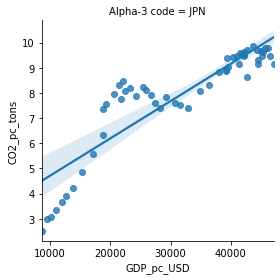

In [79]:
sns.lmplot(data = df, x = 'GDP_pc_USD', y = 'CO2_pc_tons', col = 'Alpha-3 code', hue = 'Alpha-3 code', height = 4)

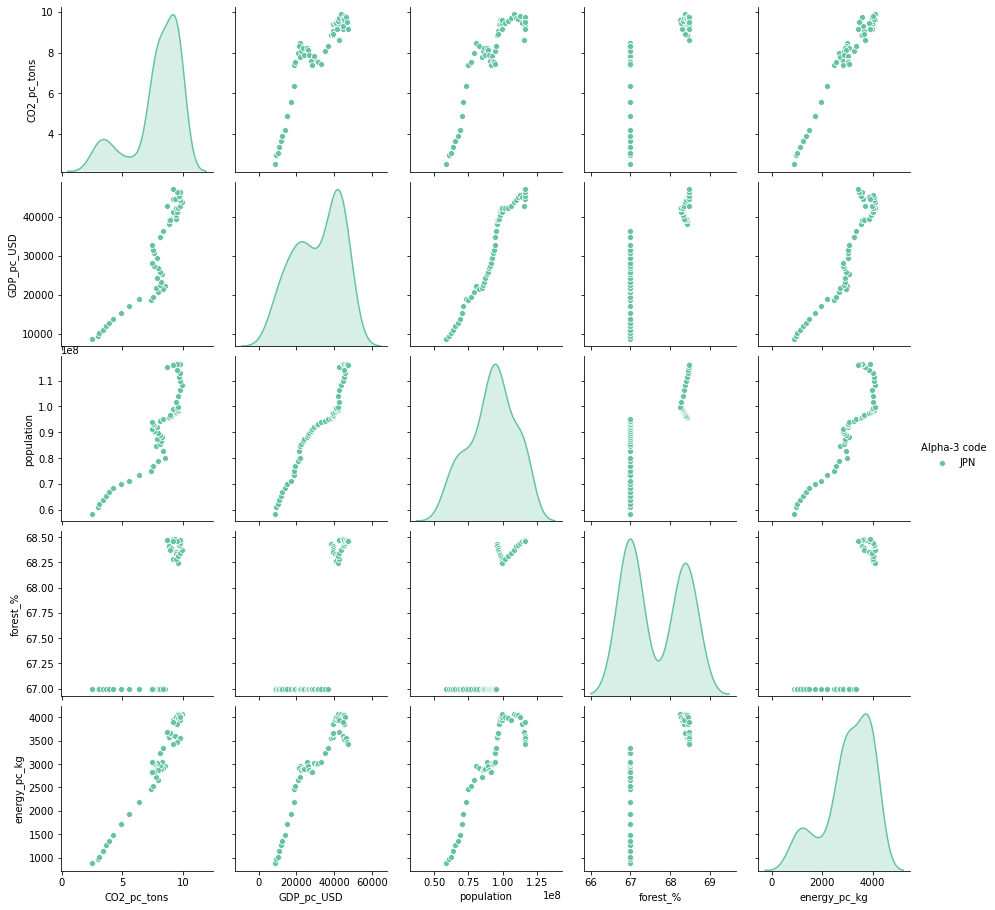

In [82]:
g = sns.pairplot(df, hue='Alpha-3 code', palette="Set2", diag_kind="kde", height=2.5)

In [70]:
#X = df[['GDP_pc_USD', 'population', 'forest_%', 'energy_pc_kg']]
#y = df['CO2_pc_tons']

X_train, X_test, y_train, y_test = train_test_split(X,y)

# Our estimators    
regressors = [
    LinearRegression(), 
    PLSRegression(), 
    RandomForestRegressor(max_depth=4)
    ]


for i in regressors:
    print(i)
    pipeline = Pipeline([\
                    ('poly', PolynomialFeatures(4)),\
                    #('scaler', PowerTransformer()),\
                    ('scaler', MinMaxScaler()),\
                    ('regressor', i)
                      ])
    
    pipeline.fit(X_train,y_train)

    y_pred = pipeline.predict(X_test)

    score_train = pipeline.score(X_train, y_train)
    score_test = pipeline.score(X_test, y_test)
    
     
    print(f'prediction \n {y_pred} \n\n true value \n{y_test} \n\n score train \n\ {score_train} \n\n score test \n\ {score_test} \n\n')
    
        
    print("model score: %.3f" % pipeline.score(X_test, y_test))                    


LinearRegression()
prediction 
 [ 7.16640913 10.90265676 10.33076726  9.83889702  7.65030368  7.21645321
  4.64753982  8.88905973  9.49103105  3.32185389  8.45349205  4.51780957
  7.92257298  4.63424059] 

 true value 
23    7.411086
13    8.472959
44    9.880903
36    9.582395
34    9.392974
26    7.534114
2     3.059736
47    9.777693
38    9.168631
7     4.863558
15    7.772671
8     5.566593
17    8.213496
6     4.206265
Name: CO2_pc_tons, dtype: float64 

 score train 
\ 1.0 

 score test 
\ 0.735952945532379 


model score: 0.736
PLSRegression()
prediction 
 [[ 7.57466807]
 [ 7.60635924]
 [10.19236233]
 [ 9.88247412]
 [ 9.50606532]
 [ 8.01633537]
 [ 3.69931103]
 [ 9.95895892]
 [ 9.77941071]
 [ 4.98502918]
 [ 7.21877029]
 [ 5.3904739 ]
 [ 7.63564146]
 [ 4.55518499]] 

 true value 
23    7.411086
13    8.472959
44    9.880903
36    9.582395
34    9.392974
26    7.534114
2     3.059736
47    9.777693
38    9.168631
7     4.863558
15    7.772671
8     5.566593
17    8.213496
6     4.

In [56]:
pipeline2 = Pipeline([\
                      ('scaler', MinMaxScaler()),\
                     ('poly', PolynomialFeatures(4)),\
                     ('lr', LinearRegression()),\
                      ])

                    
pipeline2.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

score_train2 = pipeline2.score(X_train, y_train)
score_test2 = pipeline2.score(X_test, y_test)

    
print(f'prediction \n\n {y_pred} \n\n true value \n{y_test} \n\n score \n\ {score_train2, score_test2}')

prediction 

 [ 12.76966876   8.48299215   7.31480992  -0.64102388 -12.94562804
   8.3955041    6.81191531   9.02435861  22.54414578   7.27000028
   5.54434227   6.83221278   9.82745947   7.8222974 ] 

 true value 
14    8.313879
27    7.418518
26    7.534114
1     2.981979
0     2.516538
17    8.213496
12    7.961462
38    9.168631
13    8.472959
24    7.833248
5     3.912906
23    7.411086
53    9.765911
39    9.457270
Name: CO2_pc_tons, dtype: float64 

 score 
\ (1.0, -1.6780750676204246)
